# SPRING 2021
# Applied Machine Learning, HW 9 Solutions

<b><font color='red'>Instructions:</font></b>  Read all problems very carefully. Make sure that you are answering all questions included in a given problem. For every question, you are provided with a code cell to show your solution; be sure to run the cell by pressing the SHIFT and ENTER buttons simultaneously. The output of the cell must demonstrate the correctness of your solution. If you need to insert more code cells -- feel free to do so.

**Problem 1** 

<img src='https://drive.google.com/uc?export=view&id=1v9dyG8EBMou_M_VlOj8-Rrqy9IG9686G' width='300'>

1. In this problem, you will continue working with the famous "Titanic" data set. Last week, we built a logistic regression model to predict the survival status of Titanic's passengers. This week, we will do the same using the K-Nearest Neighbors (KNN) method; we will also apply grid search to find the best number of nearest neigbors for the KNN classifier.

  First, run the code cell below to load the data set.  

In [ ]:
import pandas as pd
from seaborn import load_dataset

df=load_dataset('titanic')
cols=[0, 1, 2, 3, 6]
df=df.iloc[:, cols]
# 0 - male; 1 - female
df['sex']=(df['sex']=='female').astype(int).values

df.dropna(inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  714 non-null    int64  
 1   pclass    714 non-null    int64  
 2   sex       714 non-null    int64  
 3   age       714 non-null    float64
 4   fare      714 non-null    float64
dtypes: float64(2), int64(3)
memory usage: 33.5 KB


2. Review the "Titanic" problem from the last week's homework assigment to refresh your memory of this data set. Recall that the data frame `df` has the following columns:

  * `survived`: the passenger's survival status (0 - drowned, 1 - survived);
  * `pclass`: the passenger's ticket class (1 - 1st, 2 - 2nd, 3 - 3rd);
  * `sex`: the passenger's gender (0 - male, 1 - female);
  * `age`: the passenger's age in years;
  * `fare`: the passenger's ticket fare.

  In this week's version of the data frame, all missing values has already been removed as can be seen from the output of the `info()` method above.

3. Split the data into the training and testing sets: place 20% of the data into the testing set `X_test`, `y_test` and the rest into the training set `X_train`, `y_train`. Make sure that the proportion of the survived passengers (positive class) is the same in both training and testing sets by utilizing the `stratify` option. Use a random state of 42 when running the `train_test_split()` function.

In [ ]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

4. Build a two-step pipeline `pipe_knn` including the following steps:
  * Normalizing the data using the standard scaler approach;
  * K-Nearest Neighbors classifier (at this point, do not specify the number of nearest neighbors).

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

pipe_knn = Pipeline([
                 ('scaler', StandardScaler()),
                 ('knn', KNeighborsClassifier())
                 ])

5. Instantiate an object of the `GridSearchCV()` class called `gs` and perform a 5-fold cross-validated grid search on your training data to determine the optimal number of nearest neighbors $K$ for the pipeline introduced in the previous step. Explore the values of $K$ in the range from 1 to 10 and set `scoring='accuracy'` (you might want to review our "Validation and Fine-Tuning" lecture notes and/or homework 7 to reshresh your memory of grid search).

In [ ]:
import numpy as np
from sklearn.model_selection import GridSearchCV

gs = GridSearchCV(pipe_knn, param_grid = {'knn__n_neighbors': np.arange(1, 11)}, cv=5, scoring='accuracy')
gs.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('knn',
                                        KNeighborsClassifier(algorithm='auto',
                                                             leaf_size=30,
                                                             metric='minkowski',
                                                             metric_params=None,
                                                             n_jobs=None,
                                                             n_neighbors=5, p=2,
                                                             weights='uniform'))],
                                verbose=False),
           

6. Print to the screen the best value of $K$ found in the grid search.

In [ ]:
gs.best_params_

{'knn__n_neighbors': 4}

7. Use `gs` to compute predictions for the survival status on the test set data. Store this result in a variable called `y_pred`.

In [ ]:
y_pred=gs.predict(X_test)

8. Compute the accuracy of your predictions.

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.7832167832167832

9. Compute the confusion matrix and print it to the screen in the form of an array and in the graphical form. Set `values_format = 'd'` when plotting the confusion matrix to supress the scientific notation format and rounding. 

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[75, 10],
       [21, 37]])

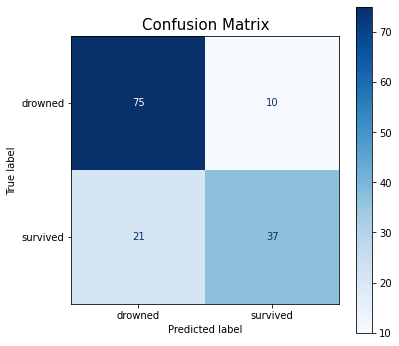

In [ ]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

class_names=['drowned', 'survived']
fig, ax = plt.subplots(figsize=(6, 6))
plot_confusion_matrix(gs, X_test, y_test,
                      display_labels=class_names, 
                      cmap=plt.cm.Blues, 
                      values_format = 'd',
                      ax=ax)

plt.title('Confusion Matrix', fontsize=15)

plt.show()

10. What are the numbers of true positives (TP), true negatives (TN), false negatives (FN), and false positives (FP)? Note that the positive class here includes those passengers who survived the disaster.

**Answers:**

* TP = 37
* TN = 75
* FN = 21
* FP = 10

**Problem 2**

1. In this problem, you will continue working with the MNIST data set that was introduced last week. This time we will buld a multiclass classifier for these data; we will try both Softmax regression and KNN.

  Start by refreshing your memory of the data set: review Problem 2 of homework 8. Then run the code cell below to fetch the MNIST data. The data set is quite large, so it might take a minute or two to load it, so please be patient.

In [ ]:
import numpy as np
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist['data'], mnist['target'].astype(np.uint8)

2. The features and labels are now stored in NumPy arrays `X` and `y`, respectively. Split the data set into the training (80%) and testing set (20%) stratifying on the target variable `y`. Use a random state of 42 when running the `train_test_split()` function.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

6. Create a new 2-step pipeline `smax` containing a standard scaler and a softmax classifier. Set the `tol` parameter of the `LogisticRegression()` class to 100 to avoid a convergence warning (this parameter controls tolerance for stopping criteria). Fit the pipeline on the training data; then make predictions on the test data and compute the accuracy of these predictions. Print the accuracy value to the screen.

In [ ]:
%%time

from sklearn.linear_model import LogisticRegression

smax=Pipeline([
               ('scale', StandardScaler()),
               ('softmax', LogisticRegression(tol=100))
               ])

smax.fit(X_train, y_train)

y_pred_smax=smax.predict(X_test)

acc_smax = accuracy_score(y_test, y_pred_smax)

print(f"The accuracy reached with the Softmax regression is {acc_smax:.5f}.")

The accuracy reached with the Softmax regression is 0.92029.
CPU times: user 15.9 s, sys: 1.64 s, total: 17.6 s
Wall time: 9.49 s


7. Create a classification report for the Softmax classifier and print it to the screen (use either the KNN lecture notes or your practicum notebook # 4 to see how we did it in class).

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_smax))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1381
           1       0.94      0.97      0.96      1575
           2       0.93      0.89      0.91      1398
           3       0.90      0.89      0.90      1428
           4       0.92      0.92      0.92      1365
           5       0.88      0.87      0.88      1262
           6       0.94      0.96      0.95      1375
           7       0.93      0.94      0.94      1459
           8       0.90      0.87      0.89      1365
           9       0.90      0.89      0.90      1392

    accuracy                           0.92     14000
   macro avg       0.92      0.92      0.92     14000
weighted avg       0.92      0.92      0.92     14000



8. Create a new 2-step pipeline knn containing a standard scaler and a KNN classifier (set the number of nearest neighbors to 5). Fit the pipeline on the training data; then make predictions on the test data and compute the accuracy of these predictions. Print the accuracy value to the screen.

  WARNING: This step typically takes 20-30 minutes of compute time, so please be patient -- just leave the notebook running, go and do something fun, and come back when the process is finished.

In [ ]:
%%time

knn=Pipeline([('scale', StandardScaler()),
              ('knn', KNeighborsClassifier(n_neighbors=5))
])

knn.fit(X_train, y_train)

y_pred_knn=knn.predict(X_test)

acc_knn = accuracy_score(y_test, y_pred_knn)

print(f"The accuracy reached with KNN is {acc_knn:.5f}.")

The accuracy reached with KNN is 0.94479.
CPU times: user 20min 5s, sys: 515 ms, total: 20min 5s
Wall time: 20min 5s


8. Create a classification report for the KNN classifier and print it to the screen.

In [ ]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1381
           1       0.95      0.99      0.97      1575
           2       0.96      0.94      0.95      1398
           3       0.93      0.95      0.94      1428
           4       0.96      0.92      0.94      1365
           5       0.94      0.92      0.93      1262
           6       0.95      0.98      0.96      1375
           7       0.93      0.94      0.94      1459
           8       0.98      0.89      0.93      1365
           9       0.90      0.92      0.91      1392

    accuracy                           0.94     14000
   macro avg       0.95      0.94      0.94     14000
weighted avg       0.95      0.94      0.94     14000

